In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import  accuracy_score

In [2]:
data = pd.read_csv("data.csv")
data = data.fillna(0).reset_index(drop=True)

In [3]:
data.head()

,PID,SCL,SCRamp,SCRfreq,HRmean,ACCmean,Energy,ZCR,VoiceProb,Hirability
0,P1,0.827077,0.094424,2.898792,73.276206,66.491987,0.005447,0.120261,0.403078,4
1,P2,5.183890,0.244549,5.219806,102.502828,65.031908,0.005782,0.074726,0.457309,5
2,P3,0.023257,0.000000,0.000000,90.603827,64.658708,0.006265,0.098657,0.427495,5
3,P4,0.211715,0.008790,2.299042,80.258785,65.260810,0.006127,0.091186,0.437544,3
4,P5,0.082192,0.011505,1.299459,71.348170,66.607203,0.005081,0.076909,0.374498,4


In [4]:
X = data.iloc[:,1:9]
Y = data.iloc[:,9]

### (1) Feature exploration: 
Compute the Pearson's correlation between each feature
and the hirability score (i.e., 8 correlations in total). Which features appear to be the most predictive of the outcome? Please comment on the sign (i.e., positive/negative) of the correlation values.

In [5]:
correlation = {}
for i in range(1,9):
    correlation['Hirability vs '+data.keys()[i]] = data['Hirability'].corr(data.iloc[:,i], method = 'pearson')
correlation

{'Hirability vs SCL': -0.05021625845476406,
 'Hirability vs SCRamp': 0.16688940072072533,
 'Hirability vs SCRfreq': -0.2800735495084652,
 'Hirability vs HRmean': 0.08944574167632675,
 'Hirability vs ACCmean': 0.029484047111286063,
 'Hirability vs Energy': 0.47680015120642166,
 'Hirability vs ZCR': -0.04925202789907907,
 'Hirability vs VoiceProb': 0.2872210071588297}

From the above correlation coefficients, its it can be observed that SCRamp, Energy and VoiceProb feature positively correlate to Hirability while SCRfeq seems to negatively correlate to Hirability. A negative correlation mean as the feature (SCRfreq) grows, Hirability decreases.

### (2) Decision tree modeling: 
Use a decision tree to estimate each interviewee's
hirability score based on their physiological and vocal measures. Use a leave-one-sample-out cross-validation (i.e., equivalent to leave-one-participant-out in this case), according to which you will have as many folds as the number of samples (i.e., participants). In each fold, you will use one participant as the test and the rest for training the decision tree. Please collect the estimated hirability score on the test sample from each fold. After all folds are done, please report the average absolute error across all participants (i.e., by taking the estimated hirability value of the test participant from each fold). Experiment with various hyper-parameters (e.g., tree depth) and feature combinations.

### Soln:
Below are the various models, where the max tree depth (hyperparameter) is kept constant at 5, but various features are used based on the correlation scores

#### Model 1:
Features used: SCL, SCRAmp, SCRfreq, HRmean, ACCmean, Energy, ZCR, VoiceProb
* Average error = 0.846

In [12]:
loo = LeaveOneOut()
loo.get_n_splits(X)
cv = LeaveOneOut()
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 42, max_depth=15, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    print(y_test_pred)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

[5.]
[5.]
[5.]
[5.]
[4.]
[4.]
[3.]
[4.]
[5.]
[4.]
[4.]
[5.]
[4.]


0.8461538461538461

In [13]:
error

11.0

#### Model 2:
Features used: SCRAmp, SCRfreq, Energy, VoiceProb
* Average error = 0.615

In [7]:
X2 = X.iloc[:,[1,2,5,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=5, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.6153846153846154

#### Model 3:
Features used: SCRAmp, SCRfreq, VoiceProb (Correlation coefficient ~0.2)
* Average error = 0.846

In [8]:
X3 = X.iloc[:,[1,2,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=5, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.8461538461538461

#### Model 4:
Features used: SCRAmp, Energy,VoiceProb (all +ve Correlation coefficient)
* Average error = 1.0

In [9]:
X4 = X.iloc[:,[1,5,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=5, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

1.0

### Same models but now with tree depth (hyperparameter) of 2 :

#### Model 1:

Features used: SCL, SCRAmp, SCRfreq, HRmean, ACCmean, Energy, ZCR, VoiceProb

* Average error = 0.88


In [10]:
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=2, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.8823260073260071

#### Model 2:

Features used: SCRAmp, SCRfreq, Energy, VoiceProb

* Average error = 0.978

In [11]:
X2 = X.iloc[:,[1,2,5,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=2, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.9787851037851036

#### Model 3:
Features used: SCRAmp, SCRfreq, VoiceProb (Correlation coefficient ~0.2)
* Average error = 0.871

In [12]:
X3 = X.iloc[:,[1,2,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=2, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.8717948717948717

#### Model 4:
Features used: SCRAmp, Energy,VoiceProb (all +ve Correlation coefficient)
* Average error = 0.963

In [13]:
X4 = X.iloc[:,[1,5,7]]
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = tree.DecisionTreeRegressor(random_state = 1, max_depth=2, criterion='mse')
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.9638278388278388

### (3) Decision tree visualization: 
Provide a plot of the root, nodes, and decision boundaries of the best decision tree. Provide your intuition regarding the resulting model.

### Soln 
The best model is one with depth of 5 and which features of SCRAmp, SCRfreq, Energy,VoiceProb 

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(25,25))
classifier = tree.DecisionTreeRegressor(random_state = 1, criterion='mse', max_depth=5)
model = classifier.fit(X2,Y)
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 0.01
|   |--- feature_0 <= 0.14
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 0.01
|   |   |   |   |--- value: [3.00]
|   |   |   |--- feature_0 >  0.01
|   |   |   |   |--- feature_0 <= 0.12
|   |   |   |   |   |--- value: [4.00]
|   |   |   |   |--- feature_0 >  0.12
|   |   |   |   |   |--- value: [3.00]
|   |   |--- feature_3 >  0.50
|   |   |   |--- value: [5.00]
|   |--- feature_0 >  0.14
|   |   |--- value: [5.00]
|--- feature_2 >  0.01
|   |--- value: [5.00]



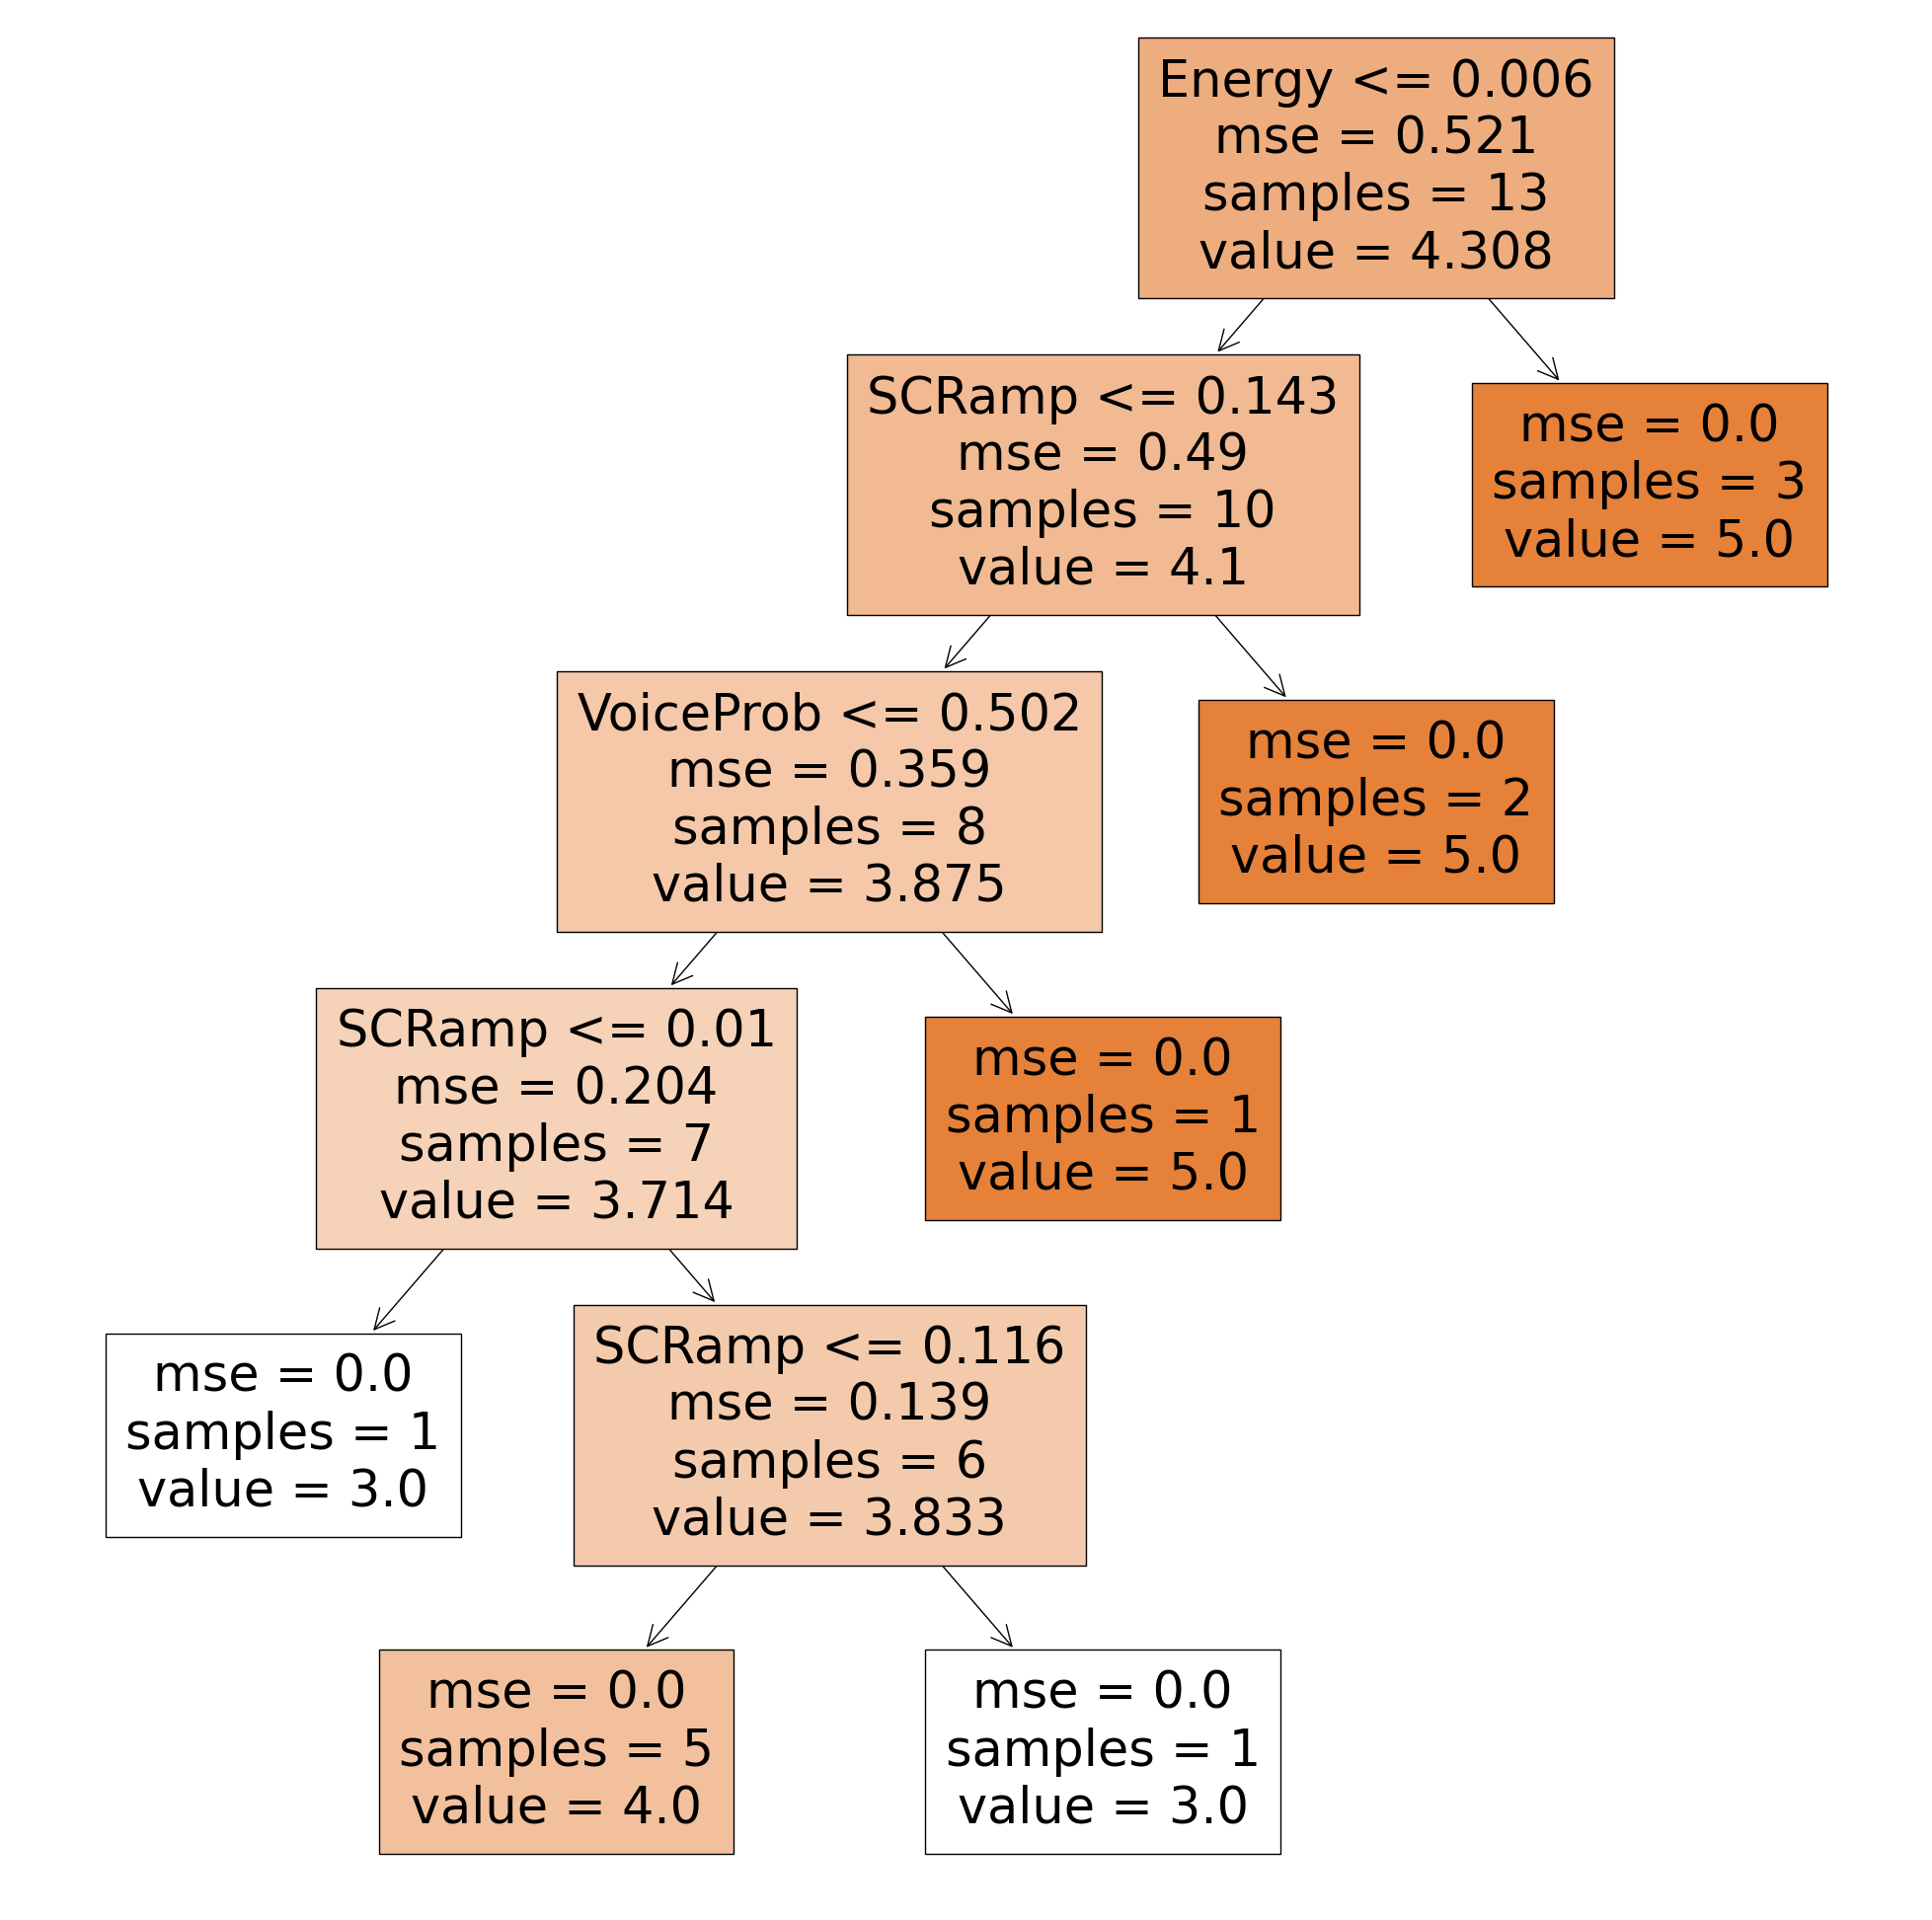

In [15]:
_ = tree.plot_tree(classifier, 
                   feature_names=[data.keys()[2],data.keys()[3],data.keys()[6],data.keys()[8]],  
                   class_names=["3","4","5"],
                   filled=True)
plt.show()

The model which has the maximum accuracy is the one with features of SCRAmp, SCRfreq, Energy, VoiceProb and has a max depth of 5 - that is - model 2. These features probably give the most accuracy since the absolute value of correlation coefficient is greater than 0.2-which shows that there is definitely some relation hirability of a candidate. Intuitively, it would make sense that SCR amplitude (average amplitude of skin conductance responses), Energy (energy of the speech signal), SCRfreq and VoiceProb (voicing probability of speech (measure of speech quality)) impact hireability, as these features would in real worl show that the candidate is confident - which is visible from his speech (his quality and energy) and he is a bit nervous - which would mean he is ready for questions and is completely alert and focused thus increasing his chances of being hired.

### Random forest:
Repeat the same task as in question (2) using a random forest. Experiment with the optimal tree depth and number of trees. Compare and contrast the performance of the decision tree with the random forest.

### Soln:
Below are the various models, where the max depth is kept constant at 5, but various features are used based on the correlation.  scores. The number of trees is defaulted to 100.

#### Model 1:
Features used: SCL, SCRAmp, SCRfreq, HRmean, ACCmean, Energy, ZCR, VoiceProb
* Average Error = 0.758

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7584615384615387

#### Model 2:
Features used: SCRAmp, SCRfreq, Energy, VoiceProb
* Average error = 0.71

In [18]:
error = 0
count = 0
for train_index, test_index in loo.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7100000000000001

#### Model 3:
Features used: SCRAmp, SCRfreq, VoiceProb (Correlation coefficient ~0.2)
* Average error = 0.696

In [19]:
error = 0
count = 0
for train_index, test_index in loo.split(X3):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.6961538461538462

#### Model 4:
Features used: SCRAmp, Energy,VoiceProb (all +ve Correlation coefficient)
* Average Error = 0.739

In [20]:
error = 0
count = 0
for train_index, test_index in loo.split(X4):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7392307692307691

Model 2 which was best for DecisionTree regressor outperforms the same one for RandomForest regressor. In the latter case, the features which gave the best classification results were with features which had correlation coefficient of approx 0.2 i.e., SCRAmp, SCRfreq, VoiceProb.

### Same models but now with tree depth of 2:

#### Model 1:
Features used: SCL, SCRAmp, SCRfreq, HRmean, ACCmean, Energy, ZCR, VoiceProb
* Average error = 0.769

In [21]:
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=2)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7699130036630039

#### Model 2:
Features used: SCRAmp, SCRfreq, Energy, VoiceProb

* Average Error = 0.713

In [22]:
error = 0
count = 0
for train_index, test_index in loo.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=2)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7137365689865689

#### Model 3:
Features used: SCRAmp, SCRfreq, VoiceProb (Correlation coefficient ~0.2)
* Average Error = 0.736

In [23]:
error = 0
count = 0
for train_index, test_index in loo.split(X3):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=2)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.736357753357753

#### Model 4:
Features used: SCRAmp, Energy,VoiceProb (all +ve Correlation coefficient)
* Average Error = 0.724

In [24]:
error = 0
count = 0
for train_index, test_index in loo.split(X4):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=2)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7248797313797314

### Same models but now with tree depth of 5 and number of trees as 50:

#### Model 1:
Features used: SCL, SCRAmp, SCRfreq, HRmean, ACCmean, Energy, ZCR, VoiceProb

* Average error = 0.732

In [35]:
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=3, n_estimators=50)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7302673992673993

#### Model 2:
Features used: SCRAmp, SCRfreq, Energy, VoiceProb

* Average error = 0.709

In [36]:
error = 0
count = 0
for train_index, test_index in loo.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5, n_estimators=50)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7092307692307694

#### Model 3:
Features used: SCRAmp, SCRfreq, VoiceProb (Correlation coefficient ~0.2)

* Average error = 0.679

In [37]:
error = 0
count = 0
for train_index, test_index in loo.split(X3):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=5, n_estimators=50)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.6799999999999999

#### Model 4:
Features used: SCRAmp, Energy,VoiceProb (all +ve Correlation coefficient)

* Average error = 0.72

In [38]:
error = 0
count = 0
for train_index, test_index in loo.split(X3):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = RandomForestRegressor(random_state = 1, criterion='mse', max_depth=3, n_estimators=50)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.7229682539682538

It can be seen that changing the hyperparamter of number of trees for Random Forest brought down the average error. One possible explanation for the above can be - the model with greater number of estimators was over fitting. It was learning noise along with the patterns. Reducing the number of tree in the forest has reduced the noise learnt, thus gave the forest a better performance on test data.

### (5) Adaboost:
Repeat the same task as in question (2) using Adaboost with a base model of your choice. Compare and contrast the performance of Adaboost method with the decision tree with the random forest.

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [42]:
error = 0
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    classifier = AdaBoostRegressor( random_state=42)
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    error = error + abs(y_test-y_test_pred).sum()
    count = count+1
avg_error = error/count
avg_error

0.6923076923076923

Using only model 2 (which uses features SCRAmp, SCRFreq, Energy,VoiceProb (all with significant correlation coefficient)) AdaBoost performs better than RandomForest or Decision Tree with dept of 2, and RandomForest with depth of 5. However, it underperforms as compared to that of DecisionTree with depth of 5. Thus, for this problem, Decision Tree with careful selection of features outperforms every other regressor model tested.